### Exploratory Analysis  (Citibike trip data in New York)

#### Preliminary Wrangling

This Notebook provides an exploration of Citibike Trip data in New York City. 
The data used in this document include all trips recorded from September,1st 2020 until October, 13th 2020. 

*Note on data as shared by citibike: data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations (which we were using more in June and July 2013), and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).*


In [1]:
#import needed packages 
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn as sb
import matplotlib.pyplot as plt
!conda install -y -c conda-forge folium

%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.



In [23]:
df=pd.read_csv('NY 202010-citibike-tripdata.csv')
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1
5,1632,2020-10-01 00:00:32.6590,2020-10-01 00:27:45.2430,502,Henry St & Grand St,40.714211,-73.981095,502,Henry St & Grand St,40.714211,-73.981095,36602,Customer,1969,0
6,234,2020-10-01 00:00:32.8840,2020-10-01 00:04:27.6710,2006,Central Park S & 6 Ave,40.765909,-73.976342,499,Broadway & W 60 St,40.769155,-73.981918,36653,Customer,1989,1
7,523,2020-10-01 00:00:41.0760,2020-10-01 00:09:24.7550,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,40.718822,-73.995960,45297,Subscriber,1980,1
8,737,2020-10-01 00:00:43.1580,2020-10-01 00:13:00.3120,480,W 53 St & 10 Ave,40.766697,-73.990617,447,8 Ave & W 52 St,40.763707,-73.985162,38143,Customer,1969,0
9,3510,2020-10-01 00:00:43.2030,2020-10-01 00:59:13.8990,4043,W 78 St & Amsterdam Ave,40.782536,-73.979085,3164,Columbus Ave & W 72 St,40.777057,-73.978985,33752,Customer,1969,0


In [27]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.info)
print(df['birth year'].describe())

(2248869, 16)
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
duration_minute            float64
dtype: object
<bound method DataFrame.info of          tripduration                 starttime                  stoptime  \
0                1403  2020-10-01 00:00:10.7870  2020-10-01 00:23:34.5400   
1                 462  2020-10-01 00:00:18.2390  2020-10-01 00:08:00.5710   
2                 770  2020-10-01 00:00:21.3070  2020-10-01 00:13:12.0840   
3                 233  2020-10-01 00:00:25.0080  2020-10-01 00:04:18.641

#### Cleaning Data

The feature 'tripduration' shows that some trips are longer than 24 hours. We need to clean entries with greater than 12 hours tripduration.

In [30]:
# make a copy of the dataframe 
#CODE: fix dtypes

dfc = df.copy()
dfc['starttime'] = pd.to_datetime(dfc['starttime'])
dfc['stoptime'] = pd.to_datetime(dfc['stoptime'])

dfc['start station id'] = dfc['start station id'].astype('str')
dfc['end station id'] = dfc['end station id'].astype('str')
dfc['bikeid'] = dfc['bikeid'].astype('str')

dfc['usertype'] = dfc['usertype'].astype('category')
dfc['gender'] = dfc['gender'].astype('category')

dfc.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248869 entries, 0 to 2248868
Data columns (total 16 columns):
tripduration               2248869 non-null int64
starttime                  2248869 non-null datetime64[ns]
stoptime                   2248869 non-null datetime64[ns]
start station id           2248869 non-null object
start station name         2248869 non-null object
start station latitude     2248869 non-null float64
start station longitude    2248869 non-null float64
end station id             2248869 non-null object
end station name           2248869 non-null object
end station latitude       2248869 non-null float64
end station longitude      2248869 non-null float64
bikeid                     2248869 non-null object
usertype                   2248869 non-null category
birth year                 2248869 non-null int64
gender                     2248869 non-null category
duration_minute            2248869 non-null float64
dtypes: category(2), datetime64[ns](2), float64(

In [32]:
#CODE 1: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

dfc['duration_minute'] = dfc['tripduration']/60

dfc['start_date'] = dfc.starttime.dt.strftime('%Y-%m-%d')
dfc['start_hourofday'] = dfc.starttime.dt.strftime('%H')
dfc['start_dayofweek'] = dfc.starttime.dt.strftime('%A')
dfc['start_month'] = dfc.starttime.dt.strftime('%B')

dfc.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1,23.383333,2020-10-01,00,Thursday,October
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2,7.700000,2020-10-01,00,Thursday,October
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1,12.833333,2020-10-01,00,Thursday,October
3,233,2020-10-01 00:00:25.008,2020-10-01 00:04:18.641,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1,3.883333,2020-10-01,00,Thursday,October
4,126,2020-10-01 00:00:25.310,2020-10-01 00:02:32.133,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1,2.100000,2020-10-01,00,Thursday,October
5,1632,2020-10-01 00:00:32.659,2020-10-01 00:27:45.243,502,Henry St & Grand St,40.714211,-73.981095,502,Henry St & Grand St,40.714211,-73.981095,36602,Customer,1969,0,27.200000,2020-10-01,00,Thursday,October
6,234,2020-10-01 00:00:32.884,2020-10-01 00:04:27.671,2006,Central Park S & 6 Ave,40.765909,-73.976342,499,Broadway & W 60 St,40.769155,-73.981918,36653,Customer,1989,1,3.900000,2020-10-01,00,Thursday,October
7,523,2020-10-01 00:00:41.076,2020-10-01 00:09:24.755,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,40.718822,-73.995960,45297,Subscriber,1980,1,8.716667,2020-10-01,00,Thursday,October
8,737,2020-10-01 00:00:43.158,2020-10-01 00:13:00.312,480,W 53 St & 10 Ave,40.766697,-73.990617,447,8 Ave & W 52 St,40.763707,-73.985162,38143,Customer,1969,0,12.283333,2020-10-01,00,Thursday,October
9,3510,2020-10-01 00:00:43.203,2020-10-01 00:59:13.899,4043,W 78 St & Amsterdam Ave,40.782536,-73.979085,3164,Columbus Ave & W 72 St,40.777057,-73.978985,33752,Customer,1969,0,58.500000,2020-10-01,00,Thursday,October


In [36]:
#ISSUE:The output above showed that there are trips with more than 12 hrs duration 
#CODE: Remove entries of >12hr duration
dfc = dfc[dfc['duration_minute'] < 720]

#TEST
dfc['duration_minute'].max()


719.35

In [40]:
#CODE: Clenaing entries which have birth year less than 1930 (they are 500 records i.e only 0.05% of dataset)
dfc = dfc[dfc['birth year'] > 1930]

#TEST: 
dfc['birth year'].min()

1931

###### Structure of Dataset
The dataset contains 53754 bike trips, with more details on riders such as (gender, birth year, user type). There are also trip-related variables such as trip duration, start and end date and time, and names and locations of start and end stations.

###### Main feature(s) of interest 
I'm interested in knowing more about where are the busiest bike stations in New York. Also when are the busiest hours of cycling in New York, and where?. Moreover, I want know about demographics of bike riders in new york (are majority female? whats the age range of citibike riders?). 


### Univariate Exploration
#### Busiest stations
A series of plots to  explore the bussiest bike stations, and where are they located?

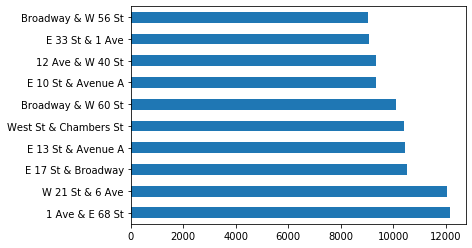

In [41]:
#CODE: histogram of top stations by number of trips
dfc['start station name'].value_counts()[:10].plot(kind='barh');
top_stations=dfc['start station name'].value_counts()[:10]


In [43]:
#adding column of count values 
dfc['Counts'] = dfc.groupby(['start station id'])['start station name'].transform('count')
dfc

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,Counts
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,...,39079,Subscriber,1995,1,23.383333,2020-10-01,00,Thursday,October,2496
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,...,41267,Subscriber,1998,2,7.700000,2020-10-01,00,Thursday,October,3525
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,...,47398,Customer,1996,1,12.833333,2020-10-01,00,Thursday,October,1768
3,233,2020-10-01 00:00:25.008,2020-10-01 00:04:18.641,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,...,36482,Subscriber,1993,1,3.883333,2020-10-01,00,Thursday,October,12143
4,126,2020-10-01 00:00:25.310,2020-10-01 00:02:32.133,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,...,45319,Subscriber,1989,1,2.100000,2020-10-01,00,Thursday,October,3441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248864,1120,2020-10-31 23:59:48.447,2020-11-01 00:18:29.328,471,Grand St & Havemeyer St,40.712868,-73.956981,3764,Bushwick Ave & McKibbin St,40.705517,...,35356,Customer,1996,1,18.666667,2020-10-31,23,Saturday,October,2412
2248865,859,2020-10-31 23:59:49.377,2020-11-01 00:14:09.192,4005,St. Nicholas Terrace & Convent Ave,40.821294,-73.947868,3960,Hamilton Pl & W 140 St,40.822756,...,48322,Customer,1999,1,14.316667,2020-10-31,23,Saturday,October,247
2248866,546,2020-10-31 23:59:52.104,2020-11-01 00:08:59.071,4010,W 145 St & Amsterdam Ave,40.825244,-73.947257,4057,Amsterdam Ave & W 167 St,40.839443,...,44589,Subscriber,1976,1,9.100000,2020-10-31,23,Saturday,October,592
2248867,748,2020-10-31 23:59:53.029,2020-11-01 00:12:21.783,3783,Cliff St & Fulton St,40.708380,-74.004950,432,E 7 St & Avenue A,40.726218,...,48511,Subscriber,1997,2,12.466667,2020-10-31,23,Saturday,October,3352


In [89]:
#Remove duplicates
dfx=dfc.drop_duplicates(subset=['start station name'])
#dfx=dfx.nlargest(10,'Counts')

In [93]:
#Starting station locations
import folium

# Make an empty map
m = folium.Map(location=[40.747391,-73.971139],tiles='OpenStreetMap',zoom_start=12)
# Adding markers on the map
for i in range(len(dfx)):
   folium.features.CircleMarker(
      location=[dfx.iloc[i]['start station latitude'], dfx.iloc[i]['start station longitude']],
      popup=dfx.iloc[i]['start station name'],
      radius=dfx.iloc[i]['Counts']/1000,
      color='#4E79A7',
      fill=True,
      fill_color='#4E79A7',
      fill_opacity=1
).add_to(m)
 
# Save it as html
#m.save('mymap.html')
m

A series of plots to explore the distribution over tripduration

In [60]:
#bins = np.arange(0, df['tripduration'].max()+5, 5)
#bins=np.arange(0,dfc['duration_minute'].quantile(0.99) + 60,  60)
bins=np.arange(0,dfc['duration_minute'].max()+5, 5)

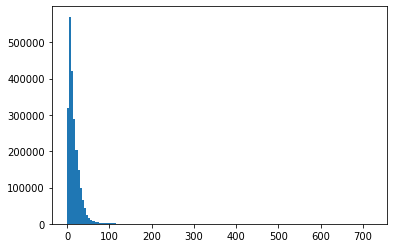

In [61]:
plt.hist(data = dfc, x = 'duration_minute',bins=bins);

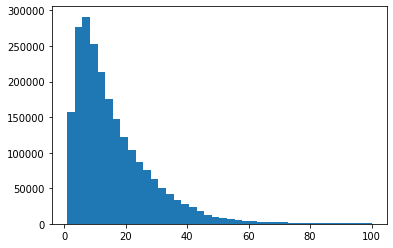

In [65]:
#Zoom into 0 to 10 min segment
df_viz=dfc[dfc['duration_minute'] < 100]
plt.hist(data = df_viz, x = 'duration_minute',bins=40);

The histogram shows that the hishest number of rides  fall into the (3-18 minutes tripduration) range. Furthermore, Almost 93% of rides lasted for 5-6 minutes. 

#### Bike Riders' Demographics
The next several plots are around customers/subscribers to see what key features of riders

Exploring differences between Male and Female riders (in respect to tripdurations)

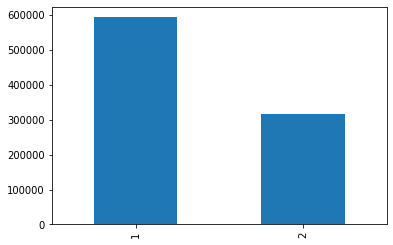

In [16]:
dfg=df[df['gender'] > 0 ]
dfg['gender'].value_counts().plot(kind='bar');
#where 2 represents female and 1 represents male

### Bivariate Exploration

Exploring differences between Male and Female riders (in respect count of trips)

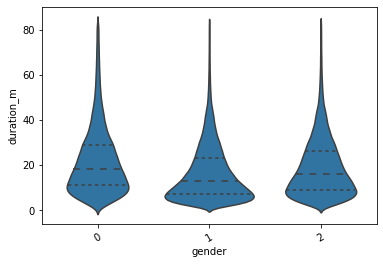

In [18]:
dfg=df[df['gender'] > 0 ]
dfg=df[df['tripduration'] < 5000]
base_color = sb.color_palette()[0]
sb.violinplot(data=dfg, x='gender', y='duration_m', color=base_color, inner='quartile')
plt.xticks(rotation=30);

Although data shows higher number of Male riders, female riders have higher mean of tripduration. 

In the following plots, the aim is to plot the tripduration against the user type (customer vs subscriber) 

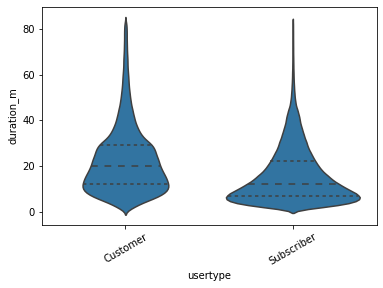

In [19]:
df2=df[df['tripduration'] < 5000]
base_color = sb.color_palette()[0]
sb.violinplot(data=df2, x='usertype', y='duration_m', color=base_color, inner='quartile')
plt.xticks(rotation=30);

In [17]:
#creating a column derived from birth year, to visualize age distribution 
df['age']=2021-df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Counts,age
0,4225,00:01.0,10:26.6,3508,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,116,W 17 St & 8 Ave,40.741776,-74.001497,44317,Customer,1979,1,965,42
1,1868,00:04.8,31:13.8,3621,27 Ave & 9 St,40.773983,-73.930913,3094,Graham Ave & Withers St,40.716981,-73.944859,37793,Customer,1991,1,288,30
2,1097,00:06.9,18:24.2,3492,E 118 St & Park Ave,40.800539,-73.941995,3959,Edgecombe Ave & W 145 St,40.823498,-73.943860,41438,Subscriber,1984,1,241,37
3,1473,00:07.7,24:41.2,3946,St Nicholas Ave & W 137 St,40.818477,-73.947568,4002,W 144 St & Adam Clayton Powell Blvd,40.820877,-73.939249,35860,Customer,1990,2,485,31
5,912,00:12.9,15:25.5,3738,Delancey St & Eldridge St,40.719383,-73.991479,3402,Court St & State St,40.690238,-73.992031,37276,Subscriber,1982,1,870,39


In the following we want explore the distribution of age. 

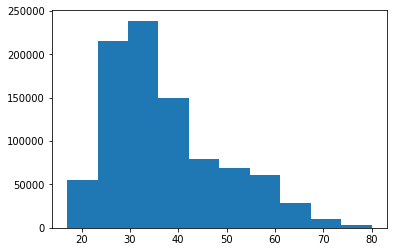

In [18]:
plt.hist(data = df, x = 'age',bins=10);

Would there be a correlation between age and tripduration? 

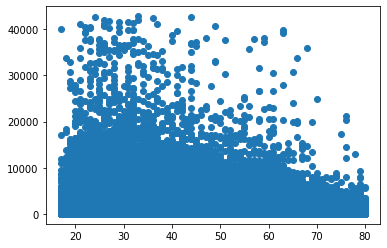

In [20]:
plt.scatter(data = df, x = 'age', y = 'tripduration');


Clearly, the data shows that the bigger the age the shorter the trip duration will be..

### Multivariate Exploration
In the plots below, we want investigate how does the average trip duration vary in Days/hours between the two Genders and between the user types (customer/subscriber)



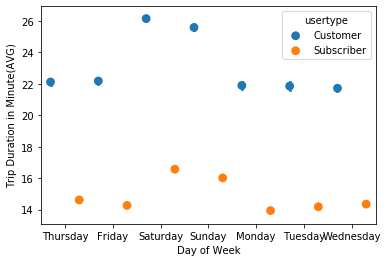

In [69]:
sb.pointplot(data=dfc, x='start_dayofweek', y='duration_minute', hue='usertype', dodge=0.6, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute(AVG)');


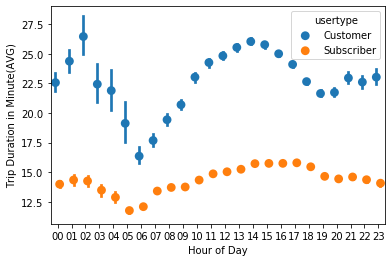

In [71]:
sb.pointplot(data=dfc, x='start_hourofday', y='duration_minute', hue='usertype', dodge=0.3, linestyles="");
plt.xlabel('Hour of Day');
plt.ylabel('Trip Duration in Minute(AVG)');


In [74]:
#CODE:replace gender values with text 
dfc['gender']= dfc['gender'].replace(0, 'unknown')
dfc['gender']=dfc['gender'].replace(1, 'Male')
dfc['gender']=dfc['gender'].replace(2, 'Female')

#TEST
dfc['gender']

0            Male
1          Female
2            Male
3            Male
4            Male
            ...  
2248864      Male
2248865      Male
2248866      Male
2248867    Female
2248868    Female
Name: gender, Length: 2245744, dtype: object

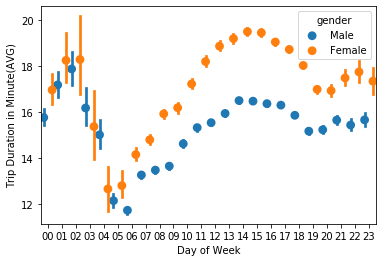

In [78]:
dfc_x=dfc[dfc['gender']!='unknown']
sb.pointplot(data=dfc_x, x='start_hourofday', y='duration_minute', hue='gender', dodge=0.6, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute(AVG)');

In [94]:
! jupyter nbconvert --to html tripdata-exploration.ipynb


[NbConvertApp] Converting notebook tripdata-exploration.ipynb to html
[NbConvertApp] Writing 2458231 bytes to tripdata-exploration.html
